In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

In [4]:
ROOT = r"C:\Users\ihett\OneDrive\Gabrilyi\leaflet_project\labeled\2_Ilyi_10102024"
IMAGE_DIR = os.path.join(ROOT, "images")
LABEL_DIR = os.path.join(ROOT, "labels")

In [5]:
image_path = os.path.join(IMAGE_DIR, os.listdir(IMAGE_DIR)[16])
label_path = os.path.join(LABEL_DIR, os.listdir(LABEL_DIR)[16])

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
polygons = utils.read_polygons(label_path)
print(polygons)

[(1, array([[ 66.85236769,  59.42432683],
       [642.52553389,  59.42432683],
       [642.52553389, 627.66945218],
       [ 66.85236769, 627.66945218]])), (1, array([[ 687.09377902,   59.42432683],
       [1413.18477252,   59.42432683],
       [1413.18477252,  631.38347261],
       [ 687.09377902,  631.38347261]])), (1, array([[  51.99628598,  956.36025998],
       [ 759.51717734,  956.36025998],
       [ 759.51717734, 1428.04085422],
       [  51.99628598, 1428.04085422]])), (1, array([[ 794.8003714 ,  999.07149489],
       [1405.75673166,  999.07149489],
       [1405.75673166, 1873.72330548],
       [ 794.8003714 , 1873.72330548]])), (1, array([[  57.56731662, 1402.04271123],
       [ 761.37418756, 1402.04271123],
       [ 761.37418756, 1907.14948932],
       [  57.56731662, 1907.14948932]])), (1, array([[1149.48932219, 1056.63881151],
       [1197.77158774, 1023.21262767],
       [1227.48375116,  898.79294336],
       [1201.48560817,  742.80408542],
       [1032.49767874,  633.2404

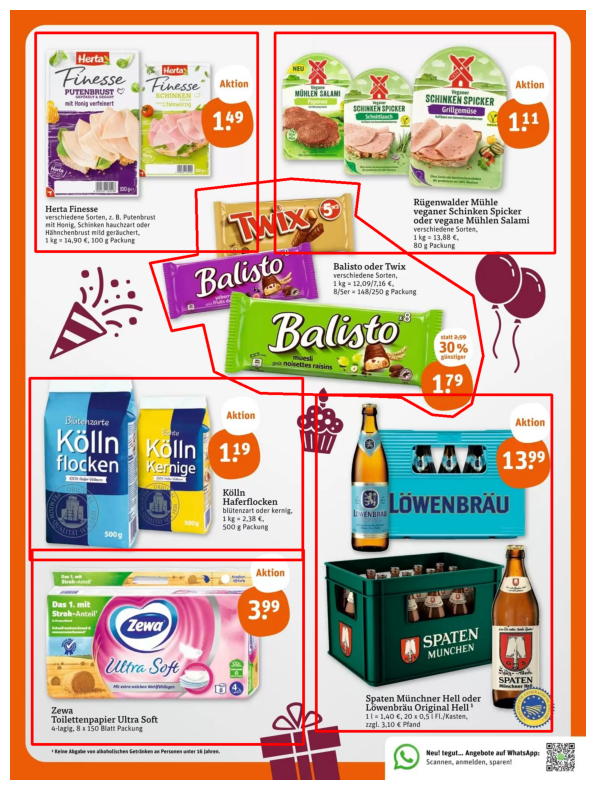

In [7]:
plot_img = image.copy()
for class_id, polygon in polygons:
    points = polygon.astype(int)
    cv2.polylines(plot_img, [points], isClosed=True, color=(255,0,0), thickness=5)

# Display the image with annotations
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)
plt.axis('off')
plt.show()

In [8]:
def extract_polygons(image, polygons):
    """
    Extracts and crops regions defined by polygons from an image.

    Args:
        image (numpy.ndarray): The source image.
        polygons (list): A list of tuples, where each tuple contains a class ID and a polygon 
                         (as a numpy array of normalized coordinates).

    Returns:
        list: A list of cropped images containing the extracted polygons.
    """
    results = []
    for class_id, polygon in polygons:
        points = polygon.astype(int)

        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [points], color=255)
        extracted = cv2.bitwise_and(image, image, mask=mask)

        x, y, w, h = cv2.boundingRect(points)

        cropped = extracted[y:y+h, x:x+w]
        results.append(cropped)

    return results


extracted = extract_polygons(image, polygons)

## OCR

In [9]:
# from paddleocr import PaddleOCR, draw_ocr
# from PIL import Image

# ocr = PaddleOCR(use_angle_cls=True, lang="de")

# for i, ext in enumerate(extracted):
#     result = ocr.ocr(ext, cls=True)
#     result = result[0]
#     boxes = [line[0] for line in result]
#     txts = [line[1][0] for line in result]
#     scores = [line[1][1] for line in result]
#     im_show = draw_ocr(ext, boxes, txts, scores, font_path="../assets/simfang.ttf")
#     plt.figure(figsize=(15, 15))
#     plt.imshow(im_show)
#     plt.axis('off')
#     plt.show()


In [ ]:
# import easyocr
# reader = easyocr.Reader(['de','en'])

# for i, ext in enumerate(extracted):
#     plt.figure(figsize=(10, 10))
#     plt.imshow(ext)
#     plt.axis('off')
#     plt.show()
#     result = reader.readtext(ext, detail=0)
#     print(result)

c:\Users\ihett\Workspace\leaflets\.venv\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_pat

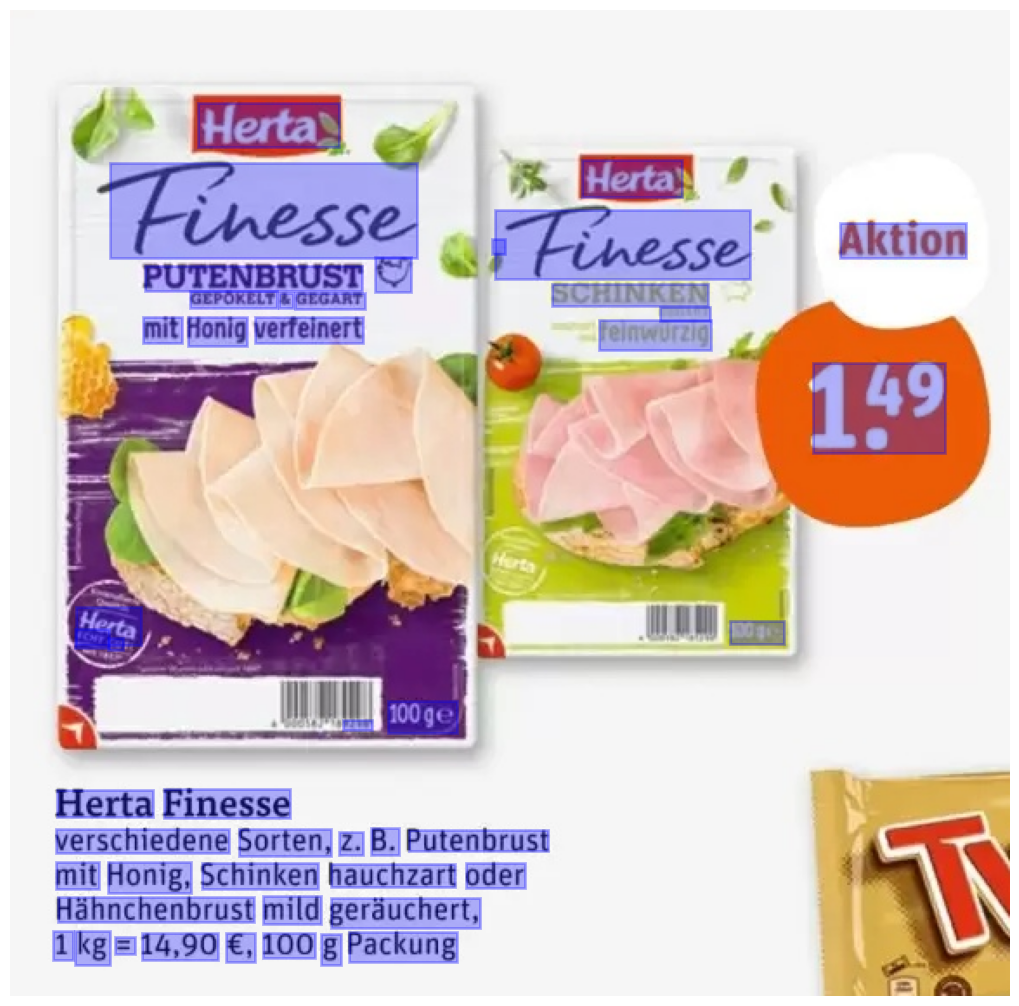

Document(
  (pages): [Page(
    dimensions=(569, 577)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='Herta', confidence=0.47)]
        ),
        Line(
          (words): [Word(value='Herta', confidence=0.45)]
        ),
        Line(
          (words): [Word(value='Finesse', confidence=0.89)]
        ),
        Line(
          (words): [
            Word(value='-', confidence=0.99),
            Word(value='Finesse', confidence=0.9),
          ]
        ),
        Line(
          (words): [Word(value='Aktion', confidence=0.99)]
        ),
        Line(
          (words): [
            Word(value='PUTENBRUST', confidence=0.85),
            Word(value='9', confidence=0.34),
          ]
        ),
        Line(
          (words): [
            Word(value='GEPOKELT', confidence=0.8),
            Word(value='&', confidence=1.0),
            Word(value='GEGART', confidence=1.0),
          ]
        ),
        Line(
          (words): [Word(value='SCHINKE

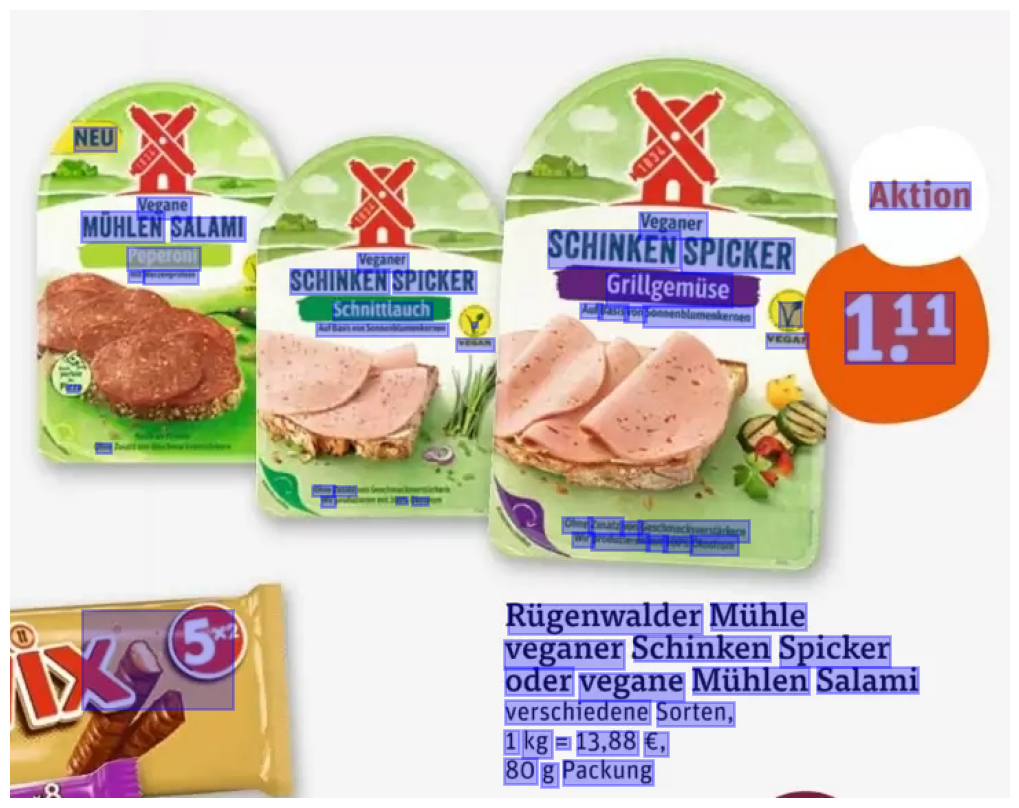

Document(
  (pages): [Page(
    dimensions=(573, 727)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='NEU', confidence=1.0)]
        ),
        Line(
          (words): [Word(value='Aktion', confidence=0.9)]
        ),
        Line(
          (words): [Word(value='Vegane', confidence=1.0)]
        ),
        Line(
          (words): [
            Word(value='MUHLEN', confidence=0.98),
            Word(value='SALAMI', confidence=0.99),
          ]
        ),
        Line(
          (words): [Word(value='Veganer', confidence=1.0)]
        ),
        Line(
          (words): [Word(value='Peperoni', confidence=0.89)]
        ),
        Line(
          (words): [Word(value='Veganer', confidence=1.0)]
        ),
        Line(
          (words): [
            Word(value='SCHINKEN', confidence=0.99),
            Word(value='SPICKER', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='-', confidence=0.92),
    

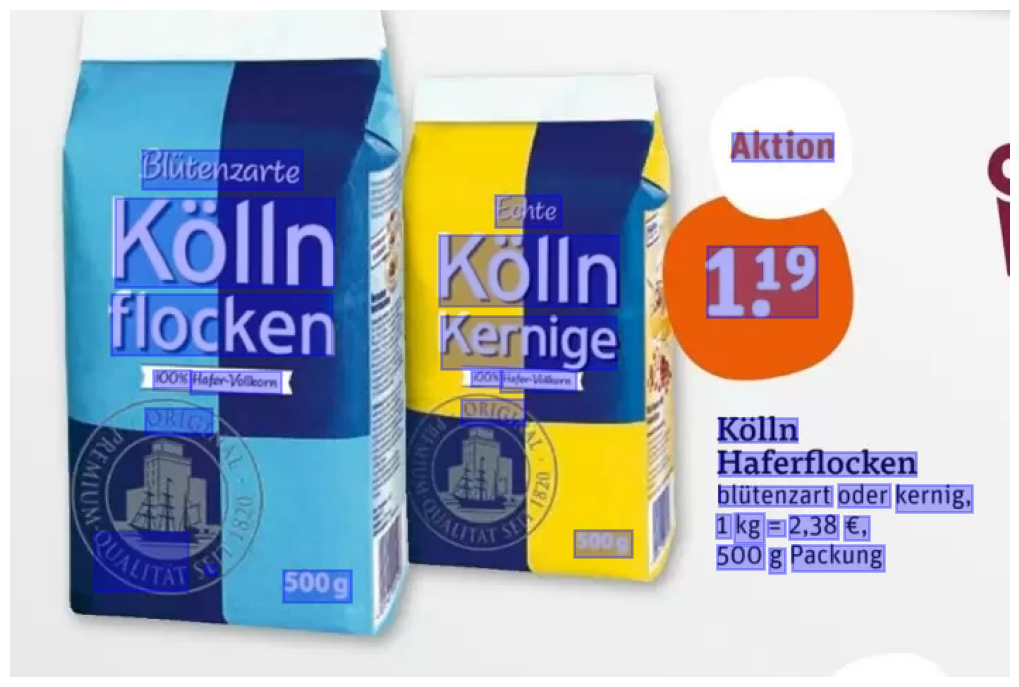

Document(
  (pages): [Page(
    dimensions=(473, 709)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='Aktion', confidence=0.67)]
        ),
        Line(
          (words): [Word(value='Butenzarte', confidence=0.7)]
        ),
        Line(
          (words): [Word(value='Echte', confidence=0.76)]
        ),
        Line(
          (words): [Word(value='Kolln', confidence=0.74)]
        ),
        Line(
          (words): [Word(value='Kolln', confidence=0.97)]
        ),
        Line(
          (words): [Word(value='119', confidence=1.0)]
        ),
        Line(
          (words): [Word(value='flocken', confidence=0.97)]
        ),
        Line(
          (words): [Word(value='Kernige', confidence=0.99)]
        ),
        Line(
          (words): [
            Word(value='100%', confidence=0.52),
            Word(value='Hafer-Vlkom', confidence=0.54),
          ]
        ),
        Line(
          (words): [
            Word(value='00N', confidenc

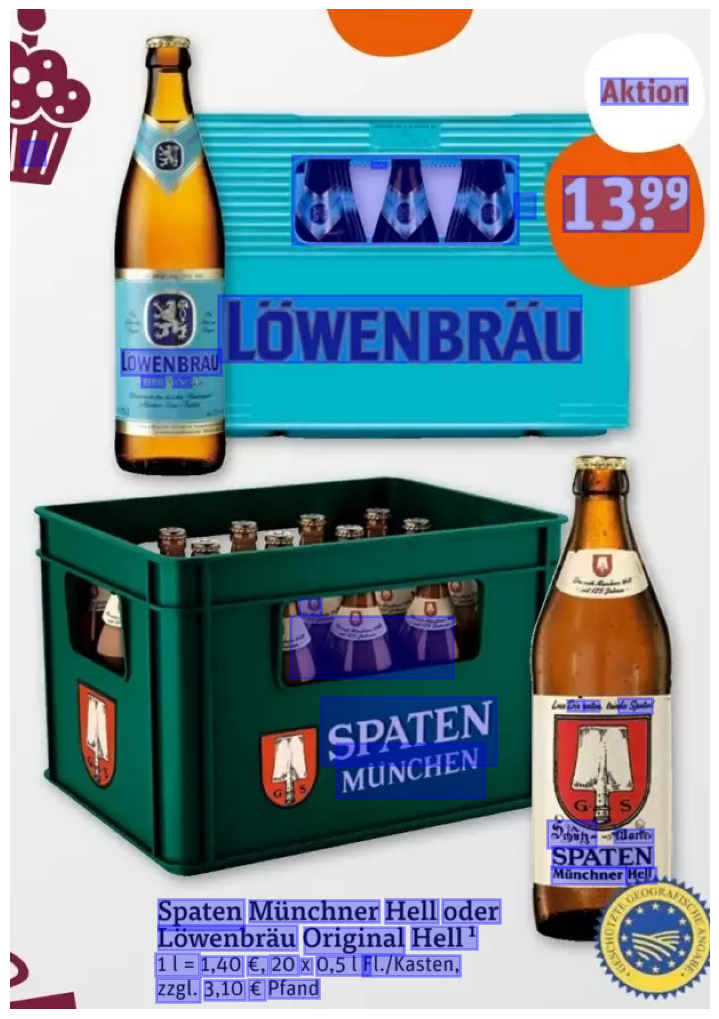

Document(
  (pages): [Page(
    dimensions=(875, 612)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='Aktion', confidence=1.0)]
        ),
        Line(
          (words): [Word(value='/', confidence=0.97)]
        ),
        Line(
          (words): [Word(value='-', confidence=0.56)]
        ),
        Line(
          (words): [
            Word(value='6', confidence=0.15),
            Word(value='=', confidence=0.49),
          ]
        ),
        Line(
          (words): [Word(value='1399', confidence=0.83)]
        ),
        Line(
          (words): [Word(value='LOWENBRAU', confidence=0.99)]
        ),
        Line(
          (words): [Word(value='LOWENBRAU', confidence=0.99)]
        ),
        Line(
          (words): [
            Word(value='ttt', confidence=0.26),
            Word(value='VA', confidence=0.49),
          ]
        ),
        Line(
          (words): [Word(value='d', confidence=0.33)]
        ),
        Line(
          (wor

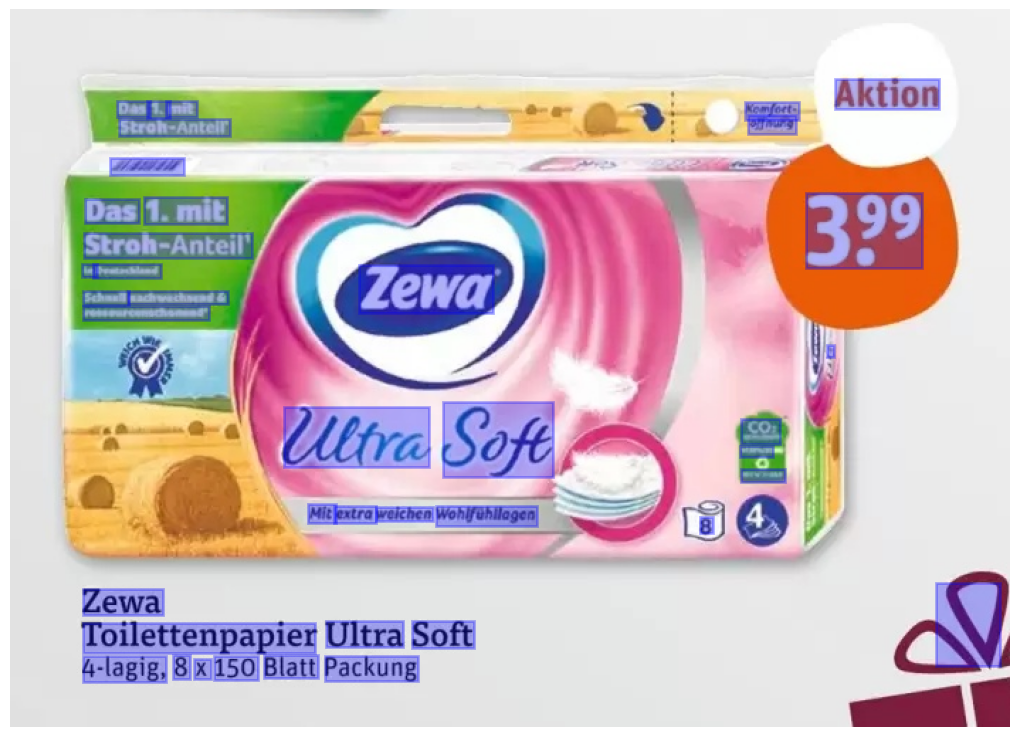

Document(
  (pages): [Page(
    dimensions=(506, 705)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='Aktion', confidence=0.99)]
        ),
        Line(
          (words): [
            Word(value='Das', confidence=0.51),
            Word(value='1.', confidence=0.99),
            Word(value='mit', confidence=0.67),
          ]
        ),
        Line(
          (words): [Word(value='Komfort-', confidence=0.56)]
        ),
        Line(
          (words): [Word(value='Stroh-Anteir', confidence=0.64)]
        ),
        Line(
          (words): [Word(value='elfnurg', confidence=0.43)]
        ),
        Line(
          (words): [Word(value='', confidence=0.67)]
        ),
        Line(
          (words): [
            Word(value='Das', confidence=0.94),
            Word(value='1.mit', confidence=0.72),
          ]
        ),
        Line(
          (words): [Word(value='Stroh-Anteil"', confidence=0.78)]
        ),
        Line(
          (words): [Wo

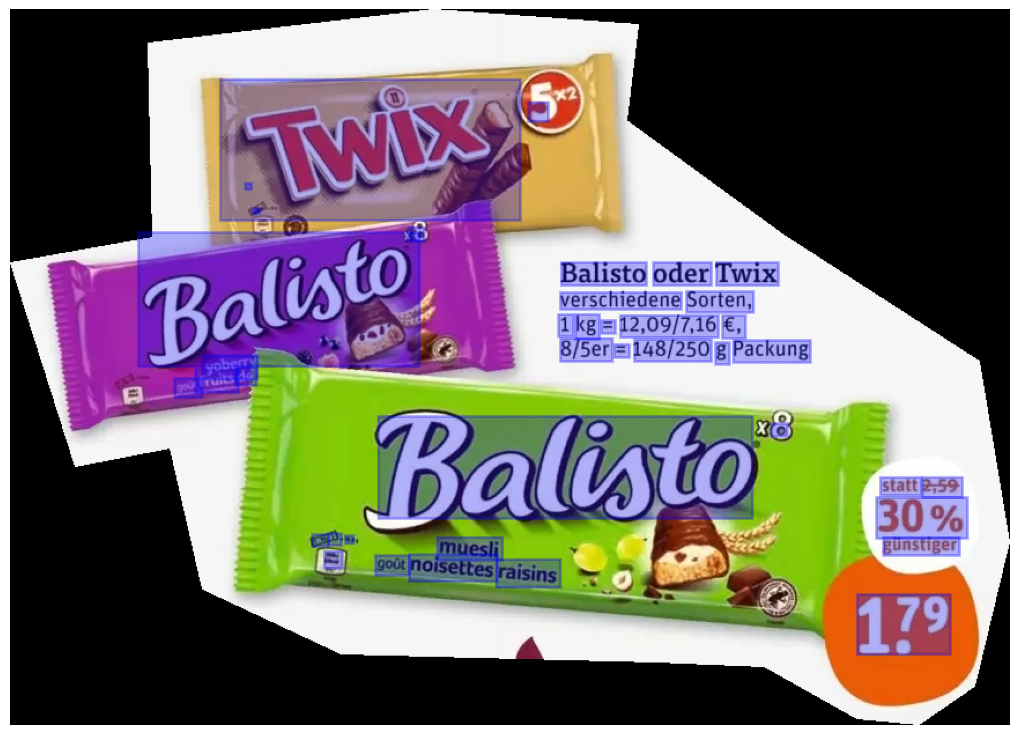

Document(
  (pages): [Page(
    dimensions=(619, 865)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='a', confidence=0.69)]
        ),
        Line(
          (words): [Word(value='-', confidence=0.72)]
        ),
        Line(
          (words): [Word(value='-', confidence=0.7)]
        ),
        Line(
          (words): [Word(value='TWWLS', confidence=0.36)]
        ),
        Line(
          (words): [Word(value='e', confidence=0.56)]
        ),
        Line(
          (words): [
            Word(value='Balisto', confidence=0.94),
            Word(value='oder', confidence=1.0),
            Word(value='Twix', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='verschiedene', confidence=1.0),
            Word(value='Sorten,', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='1', confidence=1.0),
            Word(value='kg', confidence=1.0),
            

In [18]:

from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
for i, ext in enumerate(extracted):
    result = model([ext])
    result.show()
    print(result)

In [39]:
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed")

# for i, ext in enumerate(extracted):
#     plt.figure(figsize=(10, 10))
#     plt.imshow(ext)
#     plt.axis('off')
#     plt.show()
#     pixel_values = processor(ext, return_tensors="pt").pixel_values
#     generated_ids = model.generate(pixel_values)
#     generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
#     print(generated_text)



## LLM

In [24]:
SYSTEM_PROMPT=r"""
You are an advanced language model specialized in analyzing OCR-generated text to extract structured information. Below is the OCR result from a supermarket leaflet. Your task is to identify and extract the following attributes for each product mentioned:

Title/Name: The main name or title of the product.
Current Price: The current discounted or sale price of the product.
Original Price: The original price before any discount (if available).
Discount (%): The percentage discount applied (if stated or calculable).
Specification: Key details or descriptions about the product, such as weight, quantity, or other notable features.
Instructions:

Extract the information in a structured JSON format.
If any attribute is missing or unclear in the OCR text, return "N/A" for that field.
When calculating the discount percentage, round to the nearest whole number.
Focus on clarity and precision to ensure no relevant details are missed.
Example Input (OCR Text):
"Fresh Apples - 1kg
Now only $2.50 (Was $3.00)
Save 20%!

Laundry Detergent 2L
Special Price: $5.99
Original Price: $7.99

Premium Dark Chocolate
50% off!
Current Price: $4.00
Specification: 200g bar"

Example Output:

json
Copy code
[
  {
    "Title": "Fresh Apples",
    "Current Price": "$2.50",
    "Original Price": "$3.00",
    "Discount (%)": "20",
    "Specification": "1kg"
  },
  {
    "Title": "Laundry Detergent",
    "Current Price": "$5.99",
    "Original Price": "$7.99",
    "Discount (%)": "25",
    "Specification": "2L"
  },
  {
    "Title": "Premium Dark Chocolate",
    "Current Price": "$4.00",
    "Original Price": "N/A",
    "Discount (%)": "50",
    "Specification": "200g bar"
  }
]
"""


In [21]:
def get_text(ocr_res):
    for block in ocr_res.pages[0].blocks:
        for line in block.lines:
            for word in line.words:
                yield word.value

In [ ]:
from doctr.models import ocr_predictor
from openai import OpenAI
client = OpenAI(base_url="http://localhost:5000/v1", api_key="lm-studio")
model = ocr_predictor(pretrained=True)

for i, ext in enumerate(extracted):
    result = model([ext])
    texts = list(get_text(result))
    print(texts)
    completion = client.chat.completions.create(
      model="lmstudio-community/Meta-Llama-3.1-8B-Instruct-GGUF",
      messages=[
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": f"""OCR Result:
                                        {texts}

                                        Output:

                                        This structured approach ensures clear and consistent extraction, which could integrate seamlessly with diffusion-based or other automated tools if needed later in your pipeline.
                                        """},
      ],
      temperature=0.3,
    )
    print(completion.choices[0].message.content)
    # import re
    # json_content = re.search(r"\{(?:[^{}])*\}", completion.choices[0].message.content)
    # if json_content:
    #     print(json_content.group(0))
    # else:
    #     print(completion.choices[0].message.content) 

c:\Users\ihett\Workspace\leaflets\.venv\Lib\site-packages\doctr\models\utils\pytorch.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_pat

['Herta', 'Herta', 'Finesse', '-', 'Finesse', 'Aktion', 'PUTENBRUST', '9', 'GEPOKELT', '&', 'GEGART', 'SCHINKEN', '-', 'mit', 'Honig', 'verfeinert', 'feinwurzig', '149', '6N2', 'Herta', '', 'Oge', '-', '100ge', 'Herta', 'Finesse', 'verschiedene', 'Sorten,', 'Z.', 'B.', 'Putenbrust', 'mit', 'Honig,', 'Schinken', 'nauchzart', 'oder', 'Hahnchenbrust', 'mild', 'gerauchert,', '1', 'kg', '=', '14,90', '€,', '100', 'g', 'Packung']
